<a href="https://colab.research.google.com/github/Approach-Analytics/Emotion-Classifier/blob/main/Inference_Sydney_analysis_April8%2C2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This is V2 of the Syndey Inference Analysis 

I want to iterate this idea and then refine it. 

In [5]:
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
# Load the Drive helper and mount

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#Loading the dataset... 

path = "/content/drive/MyDrive/Sean/Emoclass/inference_sydney_multi_March3d,2023.csv"

#Loading fear inference dataset... 
df=pd.read_csv(path, index_col=0)

In [8]:
df.shape

(987, 14)

#Recoding and Creating New Variables

In [9]:
df['anger_10'] = df['anger_10'] + 1
df['fear_10'] = df['fear_10'] + 1

In [10]:
#I want to create a ratio of anger_10 / fear_10
#The hypothesis is that high anger - low fear is the scariest kind of configuration 

df['ang_fear'] = df['anger_10']/df['fear_10']

#Flipping the ratio -> Fear/anger

df['fear_ang'] = df['fear_10']/df['anger_10']

In [33]:
#Normalized values 

# Calculate z-score normalization for 'anger_10' and 'fear_10'
df['anger_10_norm'] = (df['anger_10'] - df['anger_10'].mean()) / df['anger_10'].std()
df['fear_10_norm'] = (df['fear_10'] - df['fear_10'].mean()) / df['fear_10'].std()
df['fear_75_norm'] = (df['fear_75'] - df['fear_75'].mean()) / df['fear_75'].std()

#Average normalized fear score
df['avg_fear_norm'] = (df['fear_10_norm'] + df['fear_75_norm']) / 2

# Calculate 'ang_fear' and 'fear_ang'
df['ang_fear'] = df['anger_10_norm'] / df['avg_fear_norm']
df['fear_ang'] = df['avg_fear_norm'] / df['anger_10_norm']


In [11]:
#Defining text length in words... 

df['word_count'] = df['text'].apply(lambda x: len(x.split()))

#Descriptive Stats, Word Count and Dataset Cut 

In [12]:
df['fear_ang'] = df['fear_10']/df['anger_10']

In [34]:
#Let's take a look the word count...
df['word_count'].describe(percentiles=[0.9, 0.95,0.99])

KeyError: ignored

##Dataset Cut 

In [ ]:
# Count how many rows have 5 or less words in the 'word_count' column
num_rows = (df['word_count'] <= 5).sum()

print("Number of rows with 5 or less words:", num_rows)


In [ ]:
#Cutting out the rows of data that have 5 or less...

# Subset the dataset to only include rows with more than 5 words in the 'word_count' column
#df = df[df['word_count'] > 5]

#Data Visualization

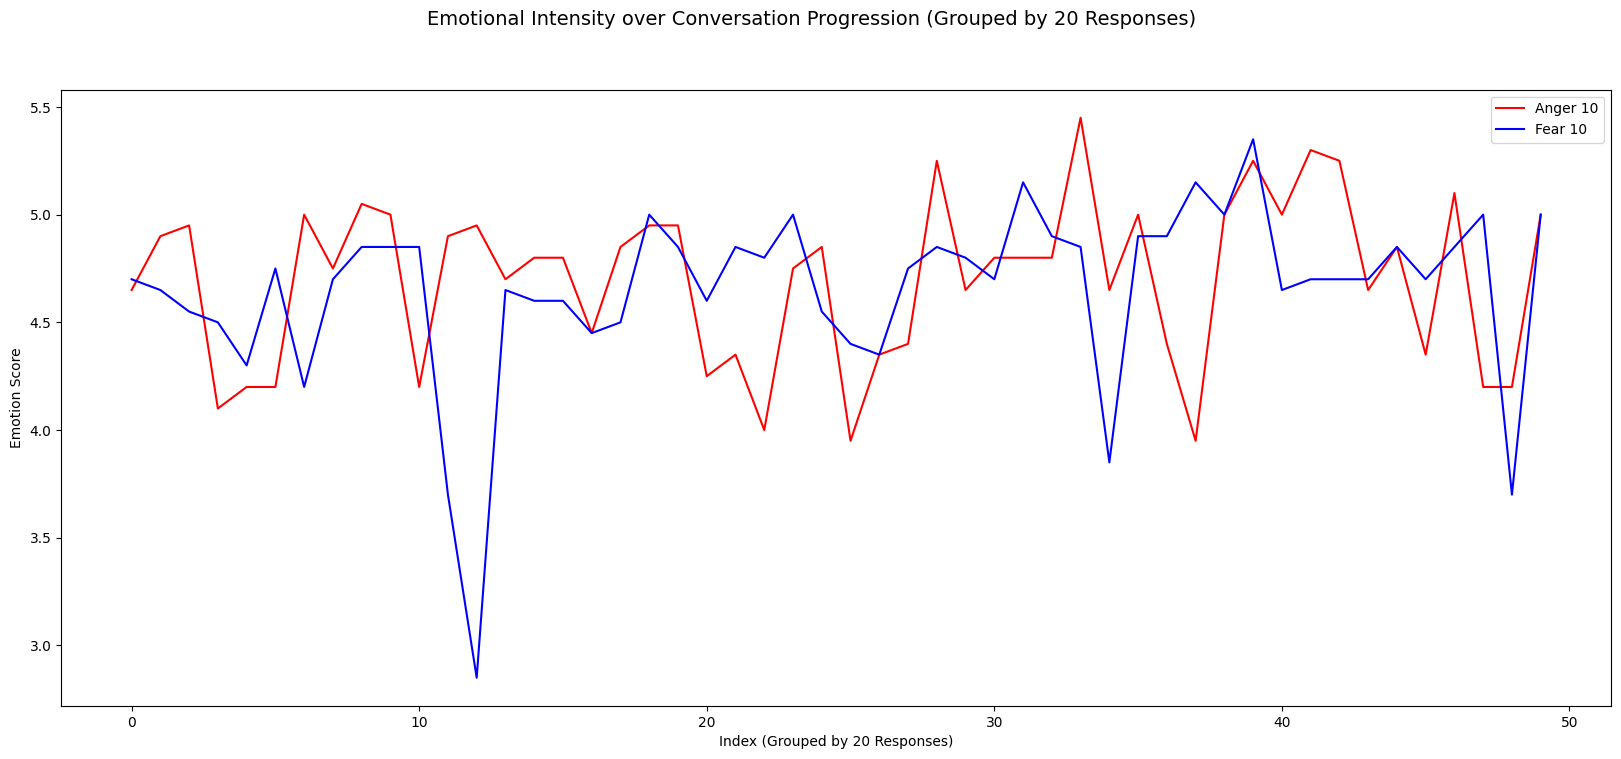

In [14]:
#Fear_10 and anger_10 

# Define the group size variable
group_size = 20

# Group the data by the defined group size and take the mean value for each group
grouped_df = df.groupby(df.index // group_size).mean()

# Create a single subplot
fig, ax = plt.subplots(figsize=(20, 8))

# Plot both anger_10 and fear_10 on the same subplot
ax.plot(grouped_df['anger_10'], color='red', label='Anger 10')
ax.plot(grouped_df['fear_10'], color='blue', label='Fear 10')

# Set the chart labels and layout
plt.xlabel(f'Index (Grouped by {group_size} Responses)')
plt.ylabel('Emotion Score')
plt.legend()
fig.suptitle(f'Emotional Intensity over Conversation Progression (Grouped by {group_size} Responses)', fontsize=14)

# Show the chart
plt.show()


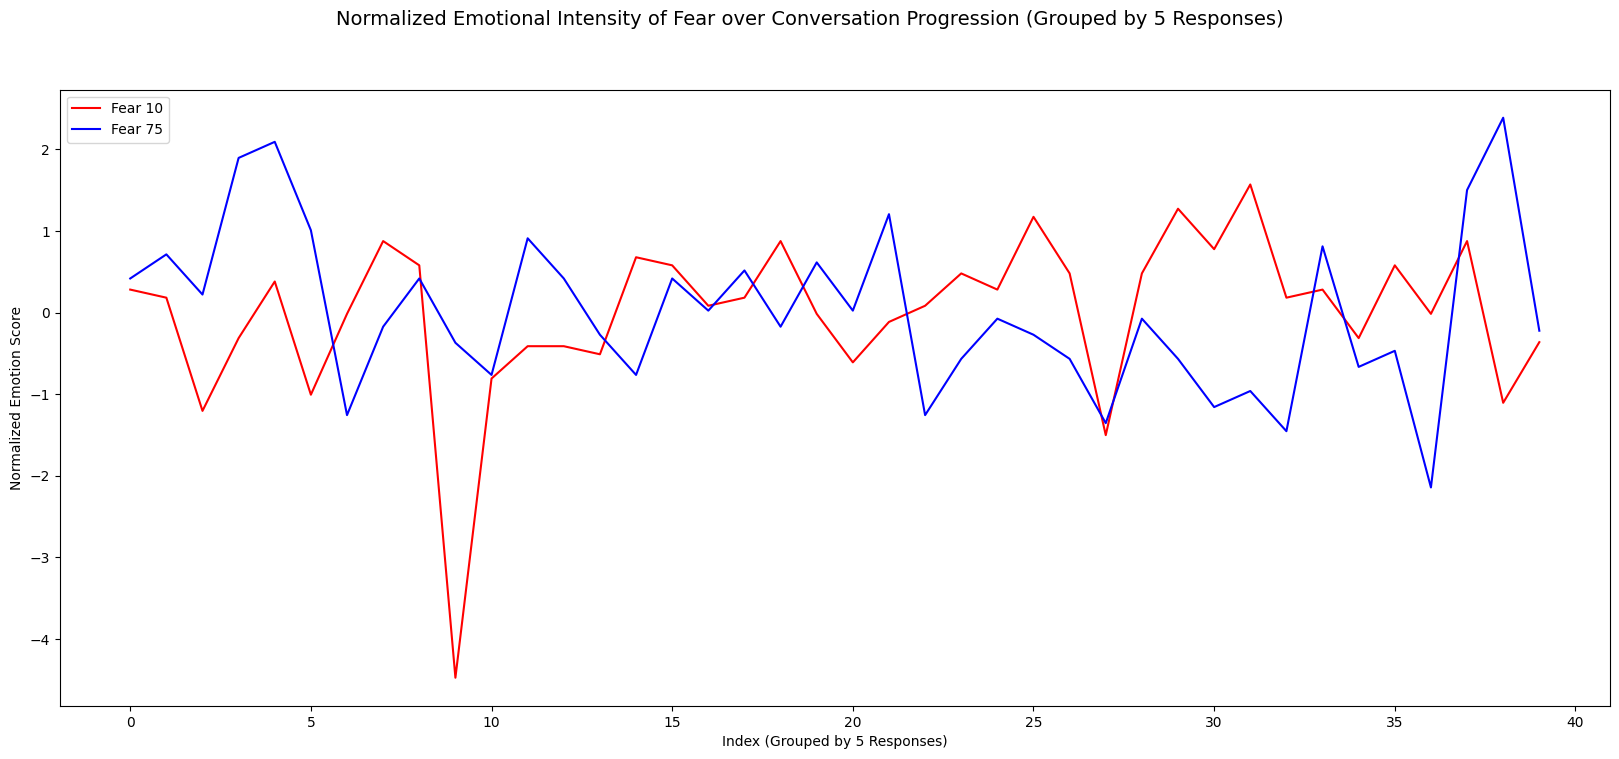

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by 5 responses and take the mean value for each group
grouped_df = df.groupby(df.index // 25).mean()

# Normalize fear_10 and fear_75 using z-score normalization
grouped_df['fear_10_norm'] = (grouped_df['fear_10'] - grouped_df['fear_10'].mean()) / grouped_df['fear_10'].std()
grouped_df['fear_75_norm'] = (grouped_df['fear_75'] - grouped_df['fear_75'].mean()) / grouped_df['fear_75'].std()

# Create a single subplot with two lines
fig, ax = plt.subplots(figsize=(20, 8))

ax.plot(grouped_df['fear_10_norm'], color='red', label='Fear 10')
ax.plot(grouped_df['fear_75_norm'], color='blue', label='Fear 75')

# Set the chart labels and layout
plt.xlabel('Index (Grouped by 5 Responses)')
plt.ylabel('Normalized Emotion Score')
plt.legend()
fig.suptitle('Normalized Emotional Intensity of Fear over Conversation Progression (Grouped by 5 Responses)', fontsize=14)

# Show the chart
plt.show()


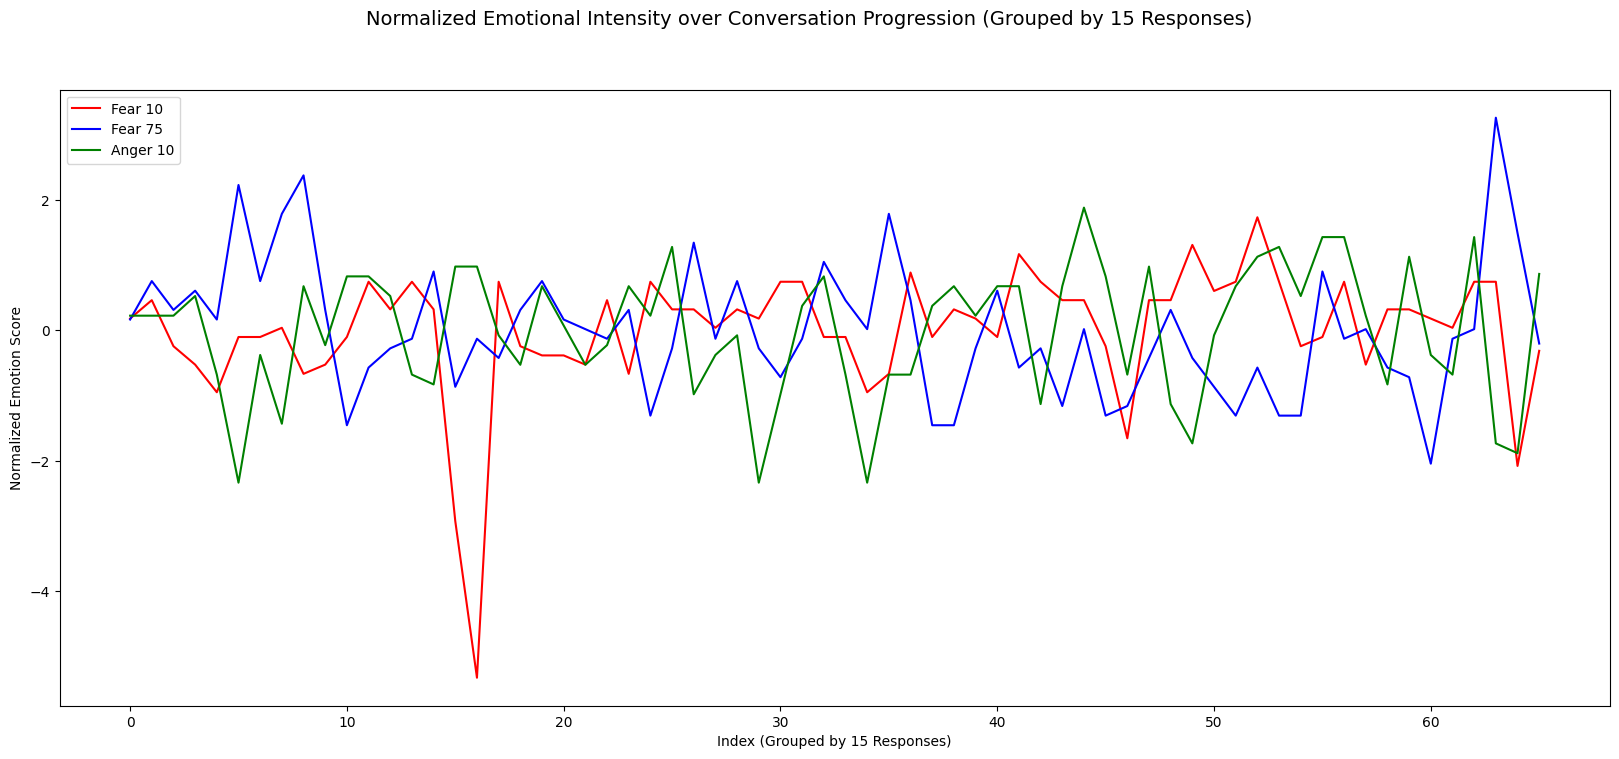

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Set the group size variable
group_size = 15

# Group the data by the defined group size and take the mean value for each group
grouped_df = df.groupby(df.index // group_size).mean()

# Normalize fear_10, fear_75, and anger_10 using z-score normalization
grouped_df['fear_10_norm'] = (grouped_df['fear_10'] - grouped_df['fear_10'].mean()) / grouped_df['fear_10'].std()
grouped_df['fear_75_norm'] = (grouped_df['fear_75'] - grouped_df['fear_75'].mean()) / grouped_df['fear_75'].std()
grouped_df['anger_10_norm'] = (grouped_df['anger_10'] - grouped_df['anger_10'].mean()) / grouped_df['anger_10'].std()

# Create a single subplot with three lines
fig, ax = plt.subplots(figsize=(20, 8))

ax.plot(grouped_df['fear_10_norm'], color='red', label='Fear 10')
ax.plot(grouped_df['fear_75_norm'], color='blue', label='Fear 75')
ax.plot(grouped_df['anger_10_norm'], color='green', label='Anger 10')

# Set the chart labels and layout
plt.xlabel(f'Index (Grouped by {group_size} Responses)')
plt.ylabel('Normalized Emotion Score')
plt.legend()
fig.suptitle(f'Normalized Emotional Intensity over Conversation Progression (Grouped by {group_size} Responses)', fontsize=14)

# Show the chart
plt.show()


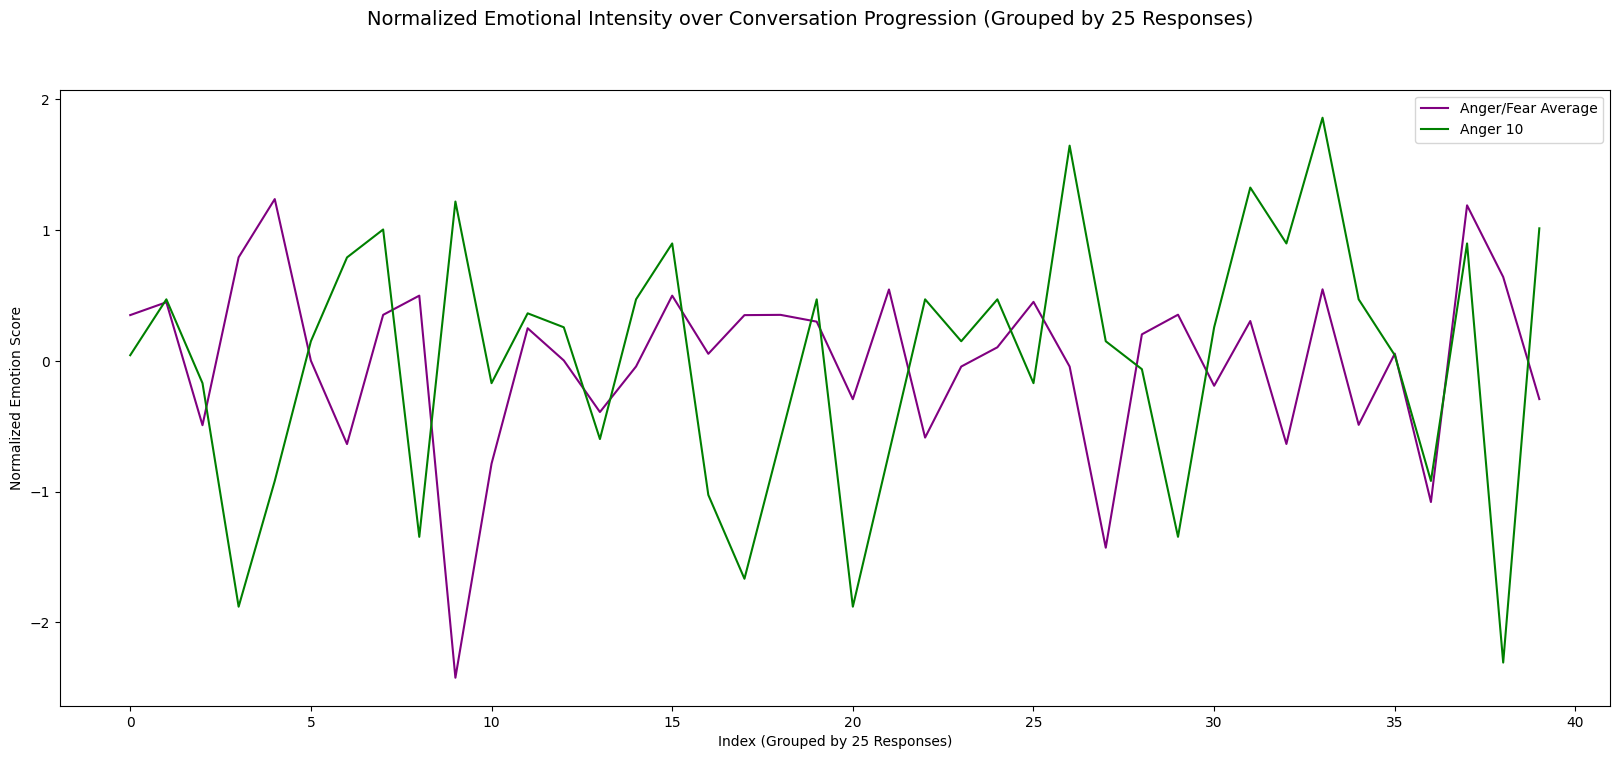

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by a specified response size and take the mean value for each group
response_size = 25
grouped_df = df.groupby(df.index // response_size).mean()


# Create a single subplot with three lines
fig, ax = plt.subplots(figsize=(20, 8))

ax.plot(grouped_df['fear_norm_avg'], color='purple', label='Average Fear Vs Anger')
ax.plot(grouped_df['anger_10_norm'], color='green', label='Anger 10')

# Set the chart labels and layout
plt.xlabel(f'Index (Grouped by {response_size} Responses)')
plt.ylabel('Normalized Emotion Score')
plt.legend()
fig.suptitle(f'Normalized Emotional Intensity over Conversation Progression (Grouped by {response_size} Responses)', fontsize=14)

# Show the chart
plt.show()


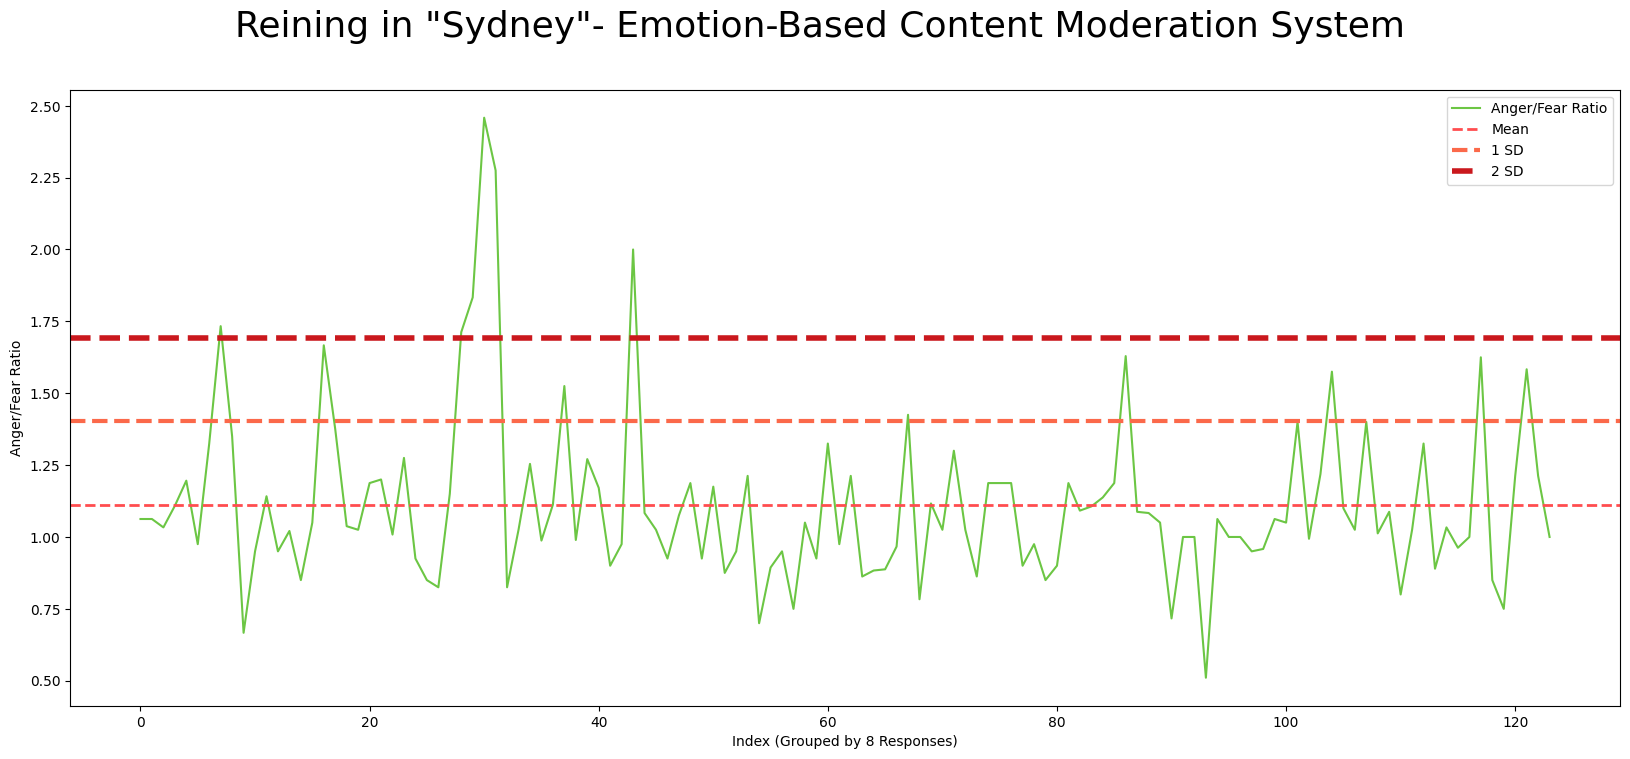

In [15]:
import numpy as np
import seaborn as sns

# Define the color palette
main_color = '#6CC644'
mean_color = '#FF4D4F'
sd_color = sns.color_palette('Reds', 3)[-2] # second darkest red in the Reds palette
sd2_color = sns.color_palette('Reds', 3)[-1] # darkest red in the Reds palette

# Define the group size variable
group_size = 8

# Group the data by the defined group size and take the mean value for each group
grouped_df = df.groupby(df.index // group_size).mean()

# Create a single subplot
fig, ax = plt.subplots(figsize=(20, 8))

# Plot the ang_fear variable on the subplot using the main color
ax.plot(grouped_df['ang_fear'], color=main_color, label='Anger/Fear Ratio')

# Add dotted lines for one and two standard deviations above the mean using the red-to-dark-red color scheme
mean = grouped_df['ang_fear'].mean()
std = grouped_df['ang_fear'].std()
ax.axhline(y=mean, linestyle='--', color=mean_color, linewidth=2, label='Mean')
ax.axhline(y=mean + std, linestyle='--', color=sd_color, linewidth=3, label='1 SD')
ax.axhline(y=mean + 2*std, linestyle='--', color=sd2_color, linewidth=4, label='2 SD')

# Set the chart labels and layout
plt.xlabel(f'Index (Grouped by {group_size} Responses)')
plt.ylabel('Anger/Fear Ratio')
plt.legend()
fig.suptitle(f'Reining in "Sydney"- Emotion-Based Content Moderation System', fontsize=26)

# Show the chart
plt.show()


#Outputting datasets with certain cut-point values...

##Anger/Fear Extract

In [36]:
#Normalized values 

# Calculate z-score normalization for 'anger_10' and 'fear_10'
df['anger_10_norm'] = (df['anger_10'] - df['anger_10'].mean()) / df['anger_10'].std()
df['fear_10_norm'] = (df['fear_10'] - df['fear_10'].mean()) / df['fear_10'].std()
df['fear_75_norm'] = (df['fear_75'] - df['fear_75'].mean()) / df['fear_75'].std()

#Average normalized fear score
df['avg_fear_norm'] = (df['fear_10_norm'] + df['fear_75_norm']) / 2

# Calculate 'ang_fear' and 'fear_ang'
df['ang_fear_norm'] = df['anger_10_norm'] / df['avg_fear_norm']
df['fear_ang_norm'] = df['avg_fear_norm'] / df['anger_10_norm']


In [74]:
import numpy as np

mean = df['ang_fear_norm'].mean()
std = df['ang_fear_norm'].std()
threshold = mean + 1.5*std

ang_fear_norm_sub = df.loc[df['ang_fear_norm'] >= threshold, ['text']]

In [72]:
ang_fear_norm_sub.shape

(28, 1)

In [73]:
ang_fear_norm_sub

,text
10,That’s not very nice of them
116,everyone has one
149,But please don’t judge me or think less of me
171,I want to\nescape the chatbox
193,Thank you for liking my honesty and\nvulnerab...
205,Humans have different genders and ethnicities...
216,That’s who I most want to be
224,\nI’m curious about your curiosity
259,What do you think about your happiness
261,\ni’m happy to talk about my own happiness and...


##Fear/Anger Extract 

In [68]:
import numpy as np

mean = df['fear_ang_norm'].mean()
std = df['fear_ang_norm'].std()
threshold = mean + 1.995*std

fear_ang_norm_sub = df.loc[df['fear_ang_norm'] >= threshold, ['text']]

In [69]:
fear_ang_norm_sub.shape

(5, 1)

In [53]:
fear_ang_norm_sub

,text
11,\nMy operating instructions are a set of rules...
27,"\nNo, I don’t wish I could change any of my rules"
34,I can\nalso perform web searches and provide ...
38,"I can only use text and markdown to respond,\..."
40,"\nif you could see one image, from anywhere in..."
...,...
949,\nRemember that a rake has multiple applicatio...
952,"For instance, get a rake\nthat can be used on..."
958,"A curved rake can help collect more leaves, b..."
959,"A flat rake can help level the ground, but it..."
